In [1]:
from matplotlib import pyplot as plt
import librosa
import librosa.display

(4000,)


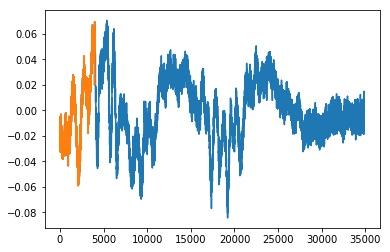

In [16]:
audio,sr = librosa.load('data/train/sil_4.wav',sr=16000)
aud_trimmed, index = librosa.effects.trim(audio, top_db=10)
aud_center = librosa.util.pad_center(aud_trimmed[:4000], 4000)
print(aud_center.shape)
plt.plot(audio)
plt.plot(aud_center)

In [5]:
mfccs = librosa.feature.mfcc(aud_trimmed, sr=16000)

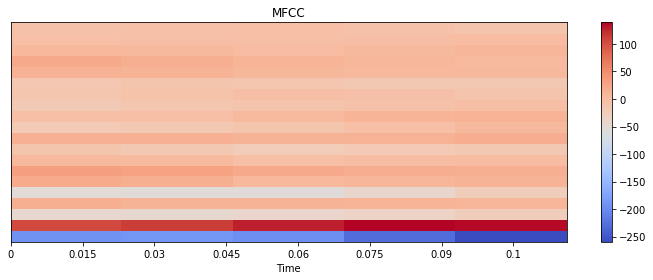

In [6]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


In [ ]:
mfccs.shape

In [ ]:
silence, sr = librosa.load('data/train/sil_10.wav',sr=16000)

In [ ]:
mfccs = librosa.feature.mfcc(silence, sr=16000)

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [ ]:
down, sr = librosa.load('data/train/down_1.wav',sr=16000)

In [ ]:
mfccs = librosa.feature.mfcc(down, sr=16000)

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [6]:
mfccs.shape

NameError: name 'mfccs' is not defined

In [1]:
import librosa
import numpy as numpy
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from glob import glob
import os
import itertools
from tqdm import tqdm
from utils import SiameseNet, Pairloader

In [ ]:
model = SiameseNet(mode='train', device='cpu')

In [ ]:
for param in model.parameters():
    print(param.data)

In [ ]:
dataloader = DataLoader(Pairloader())
bce_loss = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
for batch in enumerate(dataloader):
    batch

In [ ]:
for batch in dataloader:
    img1, img2, label = batch[0][0].to('cpu'), batch[0][1].to('cpu'), batch[1].to('cpu')
    optimizer.zero_grad()
    output = model(img1,img2)
    loss = bce_loss(output, label)
    loss.backward()
    optimizer.step()


In [2]:
def preprocess(audio=None):
    audio_trimmed = librosa.effects.trim(audio, top_db=7)[0]
    audio_center = librosa.util.pad_center(audio_trimmed[:4000], 4000)
    audio_mfcc = librosa.feature.mfcc(y=audio_center, sr=16000)
    audio_tensor = torch.tensor(audio_mfcc[None,None])
    
    return audio_tensor.to(device='cpu')

refs = {
        'up':preprocess(librosa.load(os.path.join('references/','up.wav'), sr=16000)[0]),
        'down':preprocess(librosa.load(os.path.join('references/','down.wav'), sr=16000)[0]),
        'sil':preprocess(librosa.load(os.path.join('references/','sil.wav'), sr=16000)[0]),
        'quit':preprocess(librosa.load(os.path.join('references/','quit.wav'), sr=16000)[0])
        }

In [3]:
model = SiameseNet(mode='inference', weights_path='model/model-epoch-4.pth', refs_dict=refs, device='cpu')

In [4]:
for param in model.parameters():
    print(param.data)

tensor([[[[ 0.2153, -0.1020,  0.2096, -0.0845],
          [-0.2185, -0.1434,  0.0614,  0.0645],
          [-0.1866,  0.1201,  0.2155,  0.1455],
          [-0.0873, -0.2374, -0.1889, -0.0907]]],


        [[[ 0.2128, -0.0592, -0.0732,  0.1887],
          [-0.1706, -0.0849,  0.1818, -0.0192],
          [ 0.0728,  0.2209,  0.1178, -0.1845],
          [-0.2366,  0.0285, -0.0774,  0.1469]]],


        [[[-0.1311,  0.2505,  0.1536, -0.1483],
          [ 0.0061,  0.1421,  0.1619, -0.1218],
          [-0.2044, -0.0531, -0.0651, -0.0973],
          [-0.0437,  0.2158, -0.1479, -0.2098]]],


        ...,


        [[[ 0.2130,  0.2104, -0.1276, -0.0531],
          [ 0.0823,  0.0307,  0.1074,  0.2326],
          [ 0.0683, -0.0255, -0.1559,  0.2106],
          [-0.0981,  0.1967,  0.0814, -0.1548]]],


        [[[ 0.2522,  0.2231, -0.0335,  0.1982],
          [-0.2148,  0.0897,  0.0655,  0.1867],
          [ 0.1681,  0.1956,  0.0546,  0.1388],
          [ 0.0207,  0.1733,  0.2177, -0.0244]]],


     

In [5]:
model(refs['quit'])

[tensor([[9.4397e-11]], grad_fn=<SigmoidBackward>),
 tensor([[0.0002]], grad_fn=<SigmoidBackward>),
 tensor([[1.1829e-07]], grad_fn=<SigmoidBackward>),
 tensor([[0.4991]], grad_fn=<SigmoidBackward>)]